In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path='Fruits_Vegetables/train'
data_test_path='Fruits_Vegetables/test'
data_val_path='Fruits_Vegetables/validation'

In [3]:
img_width=180
img_height=180

In [4]:
data_train=tf.keras.utils.image_dataset_from_directory(data_train_path,shuffle=True,
                                                       image_size=(img_width,img_height),batch_size=32,validation_split=False)

Found 3127 files belonging to 47 classes.


In [5]:
data_cat=data_train.class_names
data_cat

['Butter fruit',
 'Cucumber Country',
 'DRagon Fruit',
 'Muskmelon',
 'Strawberry',
 'apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'green apple',
 'jalepeno',
 'kiwi',
 'koyya',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'papaya',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'red bannan',
 'sapota',
 'soy beans',
 'spinach',
 'sweet lime',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [6]:
data_val=tf.keras.utils.image_dataset_from_directory(data_val_path,image_size=(img_height,img_width),batch_size=32,shuffle=False,)

Found 352 files belonging to 37 classes.


In [7]:
data_test=tf.keras.utils.image_dataset_from_directory(data_test_path,image_size=(img_height,img_width),shuffle=False,batch_size=32,validation_split=False)

Found 361 files belonging to 38 classes.


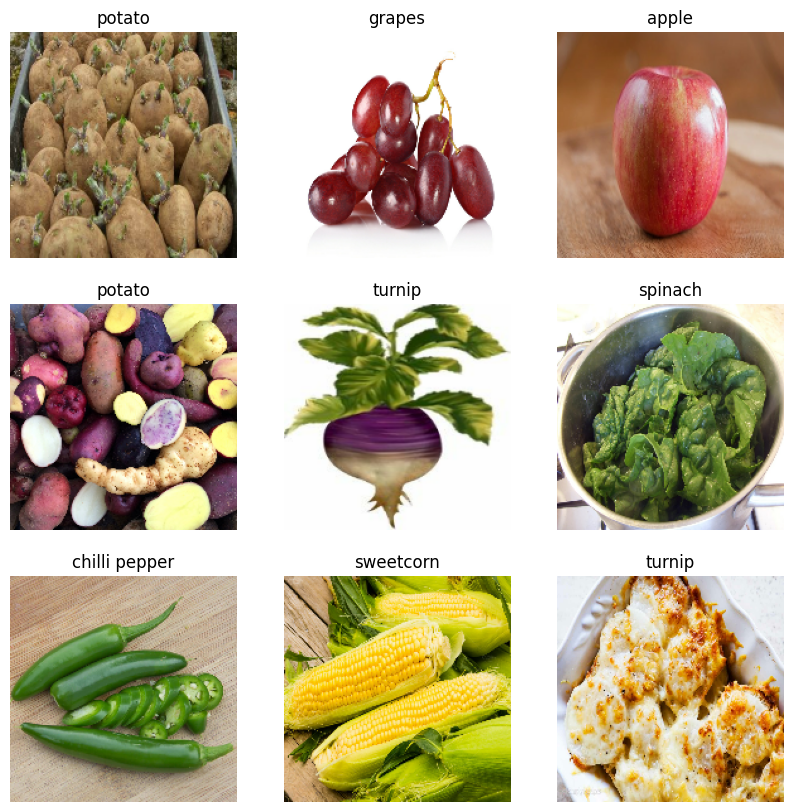

In [8]:
plt.figure(figsize=(10,10))
for image ,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model= Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(units=len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [14]:
epochs=25
history=model.fit(data_train,validation_data=data_val,epochs=epochs,batch_size=32,verbose=1)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 214ms/step - accuracy: 0.0553 - loss: 4.0061 - val_accuracy: 0.0000e+00 - val_loss: 5.4861
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.2464 - loss: 2.6178 - val_accuracy: 0.0057 - val_loss: 7.1315
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.3855 - loss: 2.1360 - val_accuracy: 0.0000e+00 - val_loss: 7.9660
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 208ms/step - accuracy: 0.5357 - loss: 1.6001 - val_accuracy: 0.0114 - val_loss: 9.1975
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 217ms/step - accuracy: 0.6764 - loss: 1.1078 - val_accuracy: 0.0028 - val_loss: 11.9777
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 236ms/step - accuracy: 0.7950 - loss: 0.7077 - val_accuracy: 0.0028 - val_loss: 14.2959
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - accuracy: 0.8664 - loss: 0.4996 - val_accuracy: 0.0000e+00 - val_loss: 16.6435
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 221ms/step - accuracy: 0.8935 - loss: 0.

Text(0.5, 1.0, 'Loss')

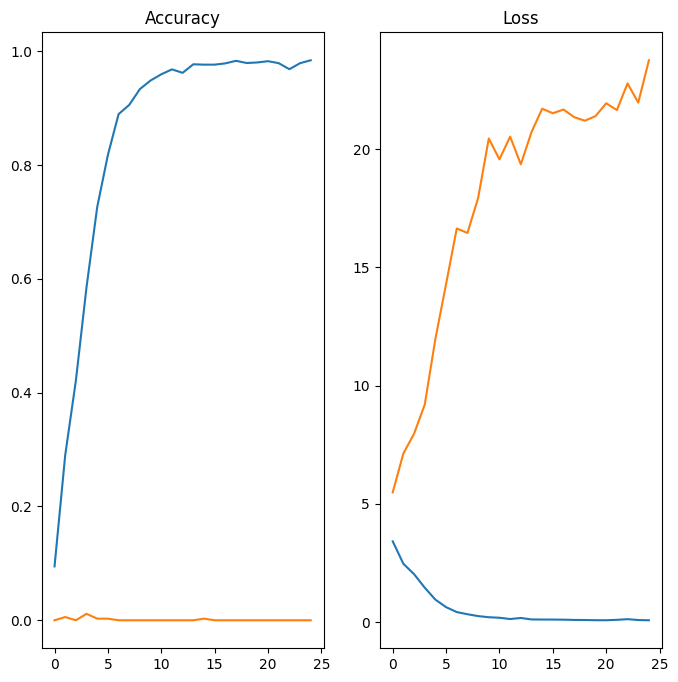

In [15]:
epochs_range=range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')



In [43]:
image='Fruits_Vegetables/papaya.png'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)


In [44]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [45]:
score=tf.nn.softmax(predict)

In [46]:
print('Veg/Fruits in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruits in image is papaya with accuracy of 98.89


In [47]:
model.save('Image_classify.keras')


In [48]:
print(model.summary())  # Ensure the model exists


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 47)                  │           6,063 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,984,111 (45.72 MB)

 Trainable params: 3,994,703 (15.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,989,408 (30.48 MB)

None


In [ ]:
model.save('Fruits_Vegetables/test//Image_classify.keras')
